**Importing Required Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Data Ingestion**

In [4]:
data = pd.read_csv('/content/allrep.data',header = None)

In [5]:
data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
           dtype='int64')

In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,replacement therapy.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807


Since the name of column is not given, lets take them form the allrep.data.

In [7]:
column_list = ['age',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH_measured',
 'TSH',
 'T3_measured',
 'T3',
 'TT4_measured',
 'TT4',
 'T4U_measured',
 'T4U',
 'FTI_measured',
 'FTI',
 'TBG_measured',
 'TBG',
 'referral_source',
 'Class']

In [8]:
data.columns = column_list

In [9]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,replacement therapy.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807


**Attribute Desciption**

**Problem Statement** : To build a classification methodology to predict the type of Thyroid a person has replacement therapy, underreplacement, overreplacement,
negative.

age - Age of the person

sex - Male or Female

on_thyroxine - true or false

on_antithyroid_medication - true or false

sick - true or false

pregnant - true or false

thyroid_surgery - true or false

I131_treatment - true or false

query_hypothyroid - true or false

query_hyperthyroid -true or false

lithium - true or false

goitre - true or false

tumor - true or false

hypopituitary- true or false

psych - true or false

TSH_measured - true or false

TSH - thyroid stimulating hormone floating value

T3_measured - true or false

T3 - triiodothyronine value

TT4_measured- true or false

TT4 - Thyroxine value

T4U_measured- true or false

T4U - numerical value

FTI_measured- true or false

FTI -Free Thyroxine Index

TBG_measured- true or false

TBG -Thyroid-Binding Globulin value

referral_source - different sources of referals

Class - replacement therapy, underreplacement, overreplacement,
negative.	


**Null Values**


In [10]:
data.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
referral_source              0
Class                        0
dtype: int64

Observation: No null values.

In [11]:
data.dtypes

age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
sick                         object
pregnant                     object
thyroid_surgery              object
I131_treatment               object
query_hypothyroid            object
query_hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                         

Even numerical columns are also in Object form

In [12]:
for i in data.columns:
  print('*******************************')
  print(f'The unique value of column {i} are {data[i].unique()}')

*******************************
The unique value of column age are ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' '?' '93' '92']
*******************************
The unique value of column sex are ['F' 'M' '?']
*******************************
The unique value of column on_thyroxine are ['f' 't']
*******************************
The unique value of column query_on_thyroxine are ['f' 't']
*******************************
The unique value of column on_antithyroid_medication are ['f' 't']
*******************************
The unique value of column sick are ['f' 't']
**************************

**Observation**
1. Missing Values are '?' format.
2. Class has member id as well.
3. TBG_Measured and TBG column has a single value.

# Feature Engineering

Removing the member id from the target class

In [13]:
def remove_diagnosis_text(diagnosis):
    return diagnosis.split('.')[0]

In [14]:
data['Class'] = data['Class'].apply(remove_diagnosis_text)


In [15]:
data['Class'].unique()

array(['negative', 'replacement therapy', 'underreplacement',
       'overreplacement'], dtype=object)

Observation: Only 4 classes are present.

In [16]:
group_by_value = data.groupby('Class').size()

<Axes: xlabel='Class'>

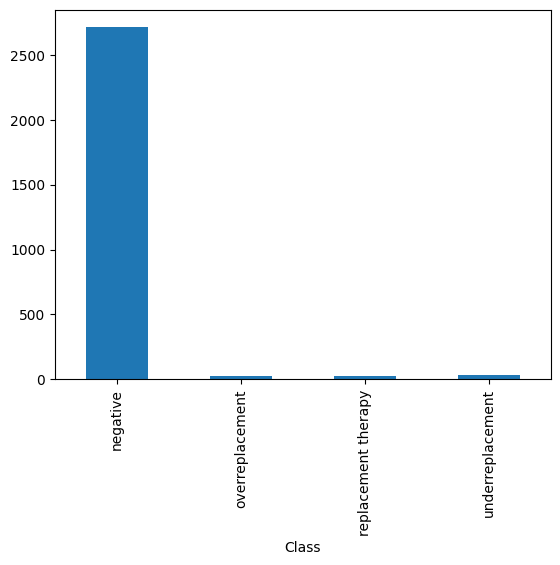

In [17]:
group_by_value.plot(kind='bar')

**Observation**: Data are imbalanced.

In [18]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,replacement therapy
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


In [19]:
numerical_value_columns = ["age","TSH","T3","TT4","T4U","FTI"]


In [20]:
for col in numerical_value_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [21]:
data.dtypes

age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
sick                          object
pregnant                      object
thyroid_surgery               object
I131_treatment                object
query_hypothyroid             object
query_hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
T

In [22]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI
count,2799.00000,2516.000000,2215.000000,2616.000000,2503.000000,2505.000000
mean,51.84423,4.672150,2.024966,109.072401,0.997912,110.787984
std,20.46116,21.449453,0.824600,35.392443,0.194390,32.883986
min,1.00000,0.005000,0.050000,2.000000,0.310000,2.000000
25%,36.00000,0.440000,1.600000,88.000000,0.880000,93.000000
50%,54.00000,1.400000,2.000000,104.000000,0.980000,107.000000
75%,67.00000,2.600000,2.400000,125.000000,1.080000,124.000000
max,455.00000,478.000000,10.600000,430.000000,2.120000,395.000000


**Replacing '?' by NaN**

In [23]:
for i in data.columns:
  for j in data[i]:
    data[i] = data[i].replace('?', np.NaN)

**Null Value**

In [24]:
data.isnull().sum()

age                             1
sex                           110
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           284
T3_measured                     0
T3                            585
TT4_measured                    0
TT4                           184
T4U_measured                    0
T4U                           297
FTI_measured                    0
FTI                           295
TBG_measured                    0
TBG                          2800
referral_source                 0
Class         

**Encoding**

In [25]:
data['sex'] = data['sex'].map({'F' : 0, 'M' : 1})

In [26]:
for column in data.columns:
    if  len(data[column].unique())==2:
        data[column] = data[column].map({'f' : 0, 't' : 1})

In [27]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41.0,0.0,0,0,0,0,0,0,0,0,...,1,125.0,1,1.14,1,109.0,f,NaN,SVHC,negative
1,23.0,0.0,0,0,0,0,0,0,0,0,...,1,102.0,0,NaN,0,NaN,f,NaN,other,negative
2,46.0,1.0,0,0,0,0,0,0,0,0,...,1,109.0,1,0.91,1,120.0,f,NaN,other,negative
3,70.0,0.0,1,0,0,0,0,0,0,0,...,1,175.0,0,NaN,0,NaN,f,NaN,other,replacement therapy
4,70.0,0.0,0,0,0,0,0,0,0,0,...,1,61.0,1,0.87,1,70.0,f,NaN,SVI,negative


In [28]:
for i in data.columns:
  print('*******************************')
  print(f'The unique value of column {i} are {data[i].unique()}')

*******************************
The unique value of column age are [ 41.  23.  46.  70.  18.  59.  80.  66.  68.  84.  67.  71.  28.  65.
  42.  63.  51.  81.  54.  55.  60.  25.  73.  34.  78.  37.  85.  26.
  58.  64.  44.  48.  61.  35.  83.  21.  87.  53.  77.  27.  69.  74.
  38.  76.  45.  36.  22.  43.  72.  82.  31.  39.  49.  62.  57.   1.
  50.  30.  29.  75.  19.   7.  79.  17.  24.  15.  32.  47.  16.  52.
  33.  13.  10.  89.  56.  20.  90.  40.  88.  14.  86.  94.  12.   4.
  11.   8.   5. 455.   2.  91.   6.  nan  93.  92.]
*******************************
The unique value of column sex are [ 0.  1. nan]
*******************************
The unique value of column on_thyroxine are [0 1]
*******************************
The unique value of column query_on_thyroxine are [0 1]
*******************************
The unique value of column on_antithyroid_medication are [0 1]
*******************************
The unique value of column sick are [0 1]
*******************************
The

Droping TBG_measured and TBG.

In [29]:
data.drop(['TBG_measured','TBG'], inplace = True, axis= 1)

In [30]:
data.head(5)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,Class
0,41.0,0.0,0,0,0,0,0,0,0,0,...,1,2.5,1,125.0,1,1.14,1,109.0,SVHC,negative
1,23.0,0.0,0,0,0,0,0,0,0,0,...,1,2.0,1,102.0,0,NaN,0,NaN,other,negative
2,46.0,1.0,0,0,0,0,0,0,0,0,...,0,NaN,1,109.0,1,0.91,1,120.0,other,negative
3,70.0,0.0,1,0,0,0,0,0,0,0,...,1,1.9,1,175.0,0,NaN,0,NaN,other,replacement therapy
4,70.0,0.0,0,0,0,0,0,0,0,0,...,1,1.2,1,61.0,1,0.87,1,70.0,SVI,negative


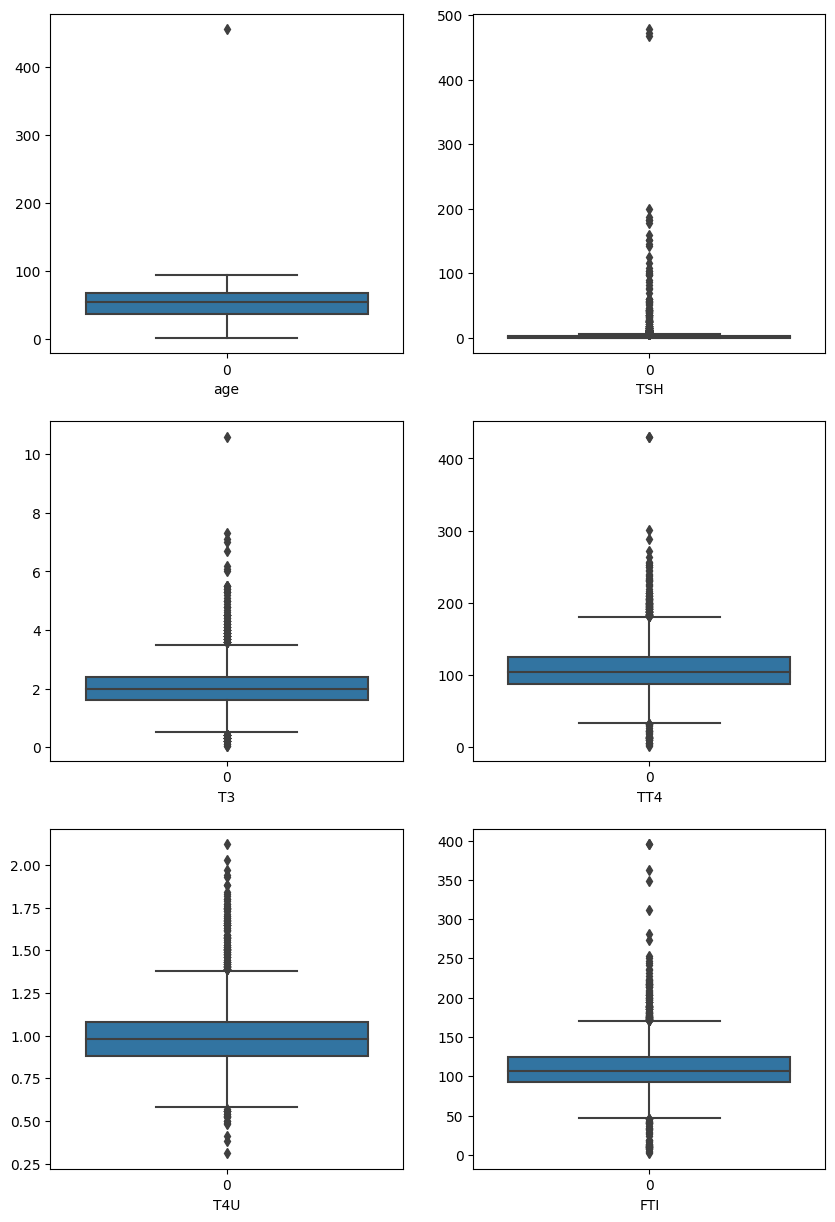

In [31]:
numerical_value_columns = ["age","TSH","T3","TT4","T4U","FTI"]

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in numerical_value_columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.boxplot(data[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [32]:
# Observation: Outliers are presents.

In [33]:
data = pd.get_dummies(data, columns=['referral_source'])

In [34]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T4U_measured,T4U,FTI_measured,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41.0,0.0,0,0,0,0,0,0,0,0,...,1,1.14,1,109.0,negative,0,1,0,0,0
1,23.0,0.0,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,negative,0,0,0,0,1
2,46.0,1.0,0,0,0,0,0,0,0,0,...,1,0.91,1,120.0,negative,0,0,0,0,1
3,70.0,0.0,1,0,0,0,0,0,0,0,...,0,NaN,0,NaN,replacement therapy,0,0,0,0,1
4,70.0,0.0,0,0,0,0,0,0,0,0,...,1,0.87,1,70.0,negative,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70.0,1.0,0,0,0,0,0,0,0,0,...,1,1.05,1,148.0,negative,0,0,0,1,0
2796,73.0,1.0,0,1,0,0,0,0,0,0,...,1,0.88,1,72.0,negative,0,0,0,0,1
2797,75.0,1.0,0,0,0,0,0,0,0,0,...,1,0.80,1,183.0,negative,0,0,0,0,1
2798,60.0,0.0,0,0,0,0,0,0,0,0,...,1,0.83,1,121.0,negative,0,0,0,0,1


In [35]:
from sklearn.preprocessing import LabelEncoder


In [36]:
lblEn = LabelEncoder()

data['Class'] =lblEn.fit_transform(data['Class'])

In [37]:
data.isnull().sum().sum()

1756

In [38]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T4U_measured,T4U,FTI_measured,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41.0,0.0,0,0,0,0,0,0,0,0,...,1,1.14,1,109.0,0,0,1,0,0,0
1,23.0,0.0,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,0,0,0,0,1
2,46.0,1.0,0,0,0,0,0,0,0,0,...,1,0.91,1,120.0,0,0,0,0,0,1
3,70.0,0.0,1,0,0,0,0,0,0,0,...,0,NaN,0,NaN,2,0,0,0,0,1
4,70.0,0.0,0,0,0,0,0,0,0,0,...,1,0.87,1,70.0,0,0,0,0,1,0


In [39]:
data.groupby('Class').size()

Class
0    2713
1      23
2      29
3      35
dtype: int64

**Handling Null values.**

In [40]:
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.impute import KNNImputer

In [41]:
new_data = data.copy()
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(data) # impute the missing values
    # convert the nd-array returned in the step above to a Dataframe
new_data=pd.DataFrame(data=np.round(new_array), columns=data.columns)

In [42]:
new_data.isnull().sum().sum()

0

**Splitting Independent and Dependent Value**

In [43]:
X = new_data.drop(['Class'],axis=1)
y = new_data['Class']


**Over Sampling**

In [44]:
sample = RandomOverSampler()
X_sampled,y_sampled  = sample.fit_resample(X,y)

**Train Test Split**

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_sampled, y_sampled, test_size=0.2, random_state=42)

## Model Training

**Logistic Regression**

In [52]:
from sklearn.linear_model import LogisticRegression


In [53]:
logistic_regression_model = LogisticRegression()


In [54]:
logistic_regression_model = logistic_regression_model.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
y_pred = logistic_regression_model.predict(X_test)

In [57]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

report = classification_report(y_test, y_pred)

In [58]:
print(report)

              precision    recall  f1-score   support

         0.0       0.91      0.74      0.82       525
         1.0       0.64      0.61      0.62       577
         2.0       0.56      0.64      0.59       551
         3.0       0.92      1.00      0.96       518

    accuracy                           0.74      2171
   macro avg       0.76      0.75      0.75      2171
weighted avg       0.75      0.74      0.74      2171



In [59]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[389,  32,  74,  30],
       [ 21, 352, 204,   0],
       [ 18, 166, 350,  17],
       [  0,   0,   0, 518]])

**Random Forest**

In [60]:
from sklearn.ensemble import RandomForestClassifier


In [61]:
random_forest_model = RandomForestClassifier()


In [62]:
random_forest_model = random_forest_model.fit(X_train, y_train)

In [63]:
y_pred = random_forest_model.predict(X_test)

In [64]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       525
         1.0       1.00      1.00      1.00       577
         2.0       1.00      1.00      1.00       551
         3.0       1.00      1.00      1.00       518

    accuracy                           1.00      2171
   macro avg       1.00      1.00      1.00      2171
weighted avg       1.00      1.00      1.00      2171



**It is performing Best**